<a href="https://colab.research.google.com/github/gaurav3009gs/Food_classification/blob/main/RawFoodclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/food/train',
    labels = 'inferred',
    label_mode = 'categorical',
    class_names =None,
    color_mode = 'rgb',
    batch_size = 32,
    image_size = (64,64),
    shuffle = True,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation = 'bilinear',
    follow_links = False,
    crop_to_aspect_ratio = False

)

Found 3115 files belonging to 36 classes.


In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/food/validation',
    labels = 'inferred',
    label_mode = 'categorical',
    class_names =None,
    color_mode = 'rgb',
    batch_size = 32,
    image_size = (64,64),
    shuffle = True,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation = 'bilinear',
    follow_links = False,
    crop_to_aspect_ratio = False

)

Found 351 files belonging to 36 classes.


In [ ]:
cnn =  tf.keras.models.Sequential()

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters = 64,kernel_size = 3,activation = 'relu',input_shape = [64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2,strides = 2))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters = 64,kernel_size = 3,activation = 'relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2,strides = 2))


In [ ]:
cnn.add(tf.keras.layers.Dropout(0.5))

In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128,activation= 'relu'))

In [ ]:
cnn.add(tf.keras.layers.Dense(units=36,activation = 'softmax'))

In [ ]:
cnn.compile(optimizer= 'rmsprop', loss='categorical_crossentropy',metrics = ['accuracy'])

In [ ]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 36)                  │           4,644 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,649,124 (6.29 MB)

 Trainable params: 1,649,124 (6.29 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=30)

Epoch 1/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 454s 5s/step - accuracy: 0.0237 - loss: 43.8655 - val_accuracy: 0.0484 - val_loss: 3.5641
Epoch 2/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 118s 1s/step - accuracy: 0.0482 - loss: 3.8216 - val_accuracy: 0.1368 - val_loss: 3.3621
Epoch 3/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.0777 - loss: 3.6215 - val_accuracy: 0.0456 - val_loss: 13.3976
Epoch 4/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.1094 - loss: 4.1297 - val_accuracy: 0.1709 - val_loss: 3.2894
Epoch 5/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.1320 - loss: 3.7728 - val_accuracy: 0.2051 - val_loss: 3.1257
Epoch 6/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 117s 1s/step - accuracy: 0.1534 - loss: 3.9466 - val_accuracy: 0.2507 - val_loss: 2.8386
Epoch 7/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 112s 1s/step - accuracy: 0.2131 - loss: 3.1630 - val_accuracy: 0.4217 - val_loss: 2.3916
Epoch 8/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 117s 1s/step - accuracy: 0.2774 - loss: 2.9994 - val_accuracy: 0.2764 -

In [ ]:
cnn.save('trained_model.h5')

In [ ]:
print(training_history.history.keys())
training_history.history

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


{'accuracy': [0.029534511268138885,
  0.05232744663953781,
  0.08314606547355652,
  0.11300160735845566,
  0.13964687287807465,
  0.17431782186031342,
  0.21990369260311127,
  0.28186196088790894,
  0.33354735374450684,
  0.37207064032554626,
  0.4215088188648224,
  0.45682182908058167,
  0.48796147108078003,
  0.5489566326141357,
  0.580738365650177,
  0.5977528095245361,
  0.6343499422073364,
  0.643338680267334,
  0.6751204133033752,
  0.6792937517166138,
  0.7069020867347717,
  0.7158908247947693,
  0.7277688384056091,
  0.748314619064331,
  0.7630818486213684,
  0.7614767551422119,
  0.7714285850524902,
  0.7669342160224915,
  0.7852327227592468,
  0.7932584285736084],
 'loss': [13.58499526977539,
  3.9978227615356445,
  3.7680776119232178,
  3.7154123783111572,
  3.45015549659729,
  3.699880599975586,
  3.109384775161743,
  2.938276529312134,
  3.0427868366241455,
  2.6994476318359375,
  2.448651075363159,
  2.462440013885498,
  2.342480182647705,
  1.9612197875976562,
  1.893661

In [ ]:
import json
with open('training_hist.jason','w') as f:
  json.dump(training_history.history,f)

In [ ]:
training_history.history['val_accuracy'][-1]

0.8774929046630859

Text(0.5, 1.0, 'Training Accuracy result')

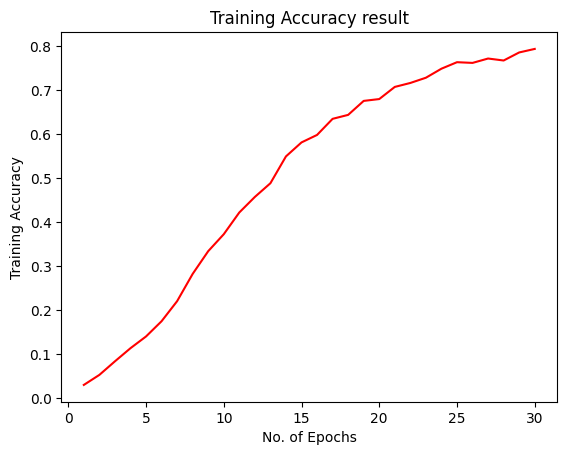

In [ ]:
epochs = [i for i in range(1,31)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy result')

Text(0.5, 1.0, 'Validation Accuracy result')

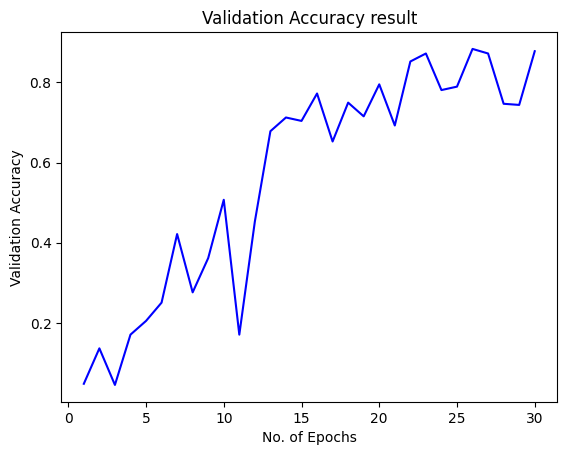

In [ ]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy result')